# Comment Analysis

## Imports

In [1]:
import pandas as pd
import pickle
import os
import math
from tqdm import tqdm
from textblob import TextBlob
from textblob_de import TextBlobDE
import emoji
import re
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists
import csv
from langdetect import detect

## Statistics of broken files

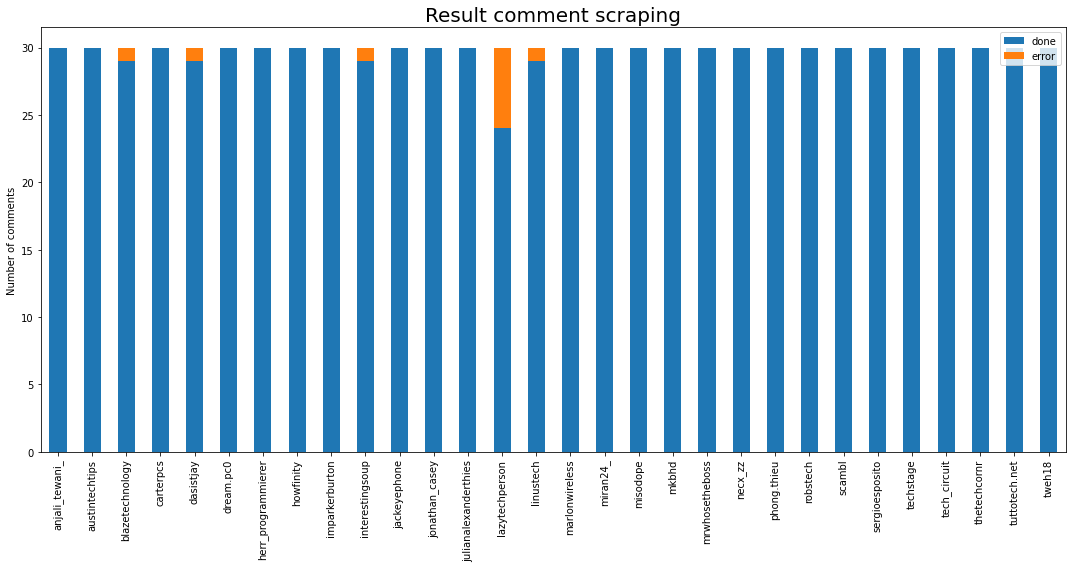

In [2]:
broken = {}
filenumber = {}
for folder in os.listdir('../01_Download/csv/comments/'):
    broken_files = []
    filenumber[folder]=len(os.listdir('../01_Download/csv/comments/'+str(folder)))-1
    for file in os.listdir('../01_Download/csv/comments/'+str(folder)):
        input_df = pd.read_csv('../01_Download/csv/comments/'+str(folder)+'/'+str(file))
        if (len(input_df)<1):
            broken_files.append(file.split('.')[0])
    broken[folder]=broken_files       
broken

keys = []
values = []
for key, value in broken.items():
    keys.append(key)
    values.append(filenumber[key]-len(value))
df = pd.DataFrame(data={'done':values}, index = keys)
df = df.assign(error=filenumber[key]-df.done)

ax = df.plot.bar(stacked=True, figsize=(15,8))
ax.set_ylabel('Number of comments')
ax.set_title('Result comment scraping', fontsize=20)

ax.figure.set_tight_layout(True)
ax.figure.savefig('screenshots/comment_scraping_result.jpg')

## Average percentage of scraped comments per influencer

In [3]:
scraping_stats = {}
for influencer in os.listdir('../01_Download/csv/comments/'):
    stat_df = pd.read_csv('../01_Download/csv/comments/'+str(influencer)+'/'+str(influencer)+'_comment_stats.csv')
    av_percentage = stat_df.value.mean()
    scraping_stats[influencer]=round(av_percentage/100,2)
    

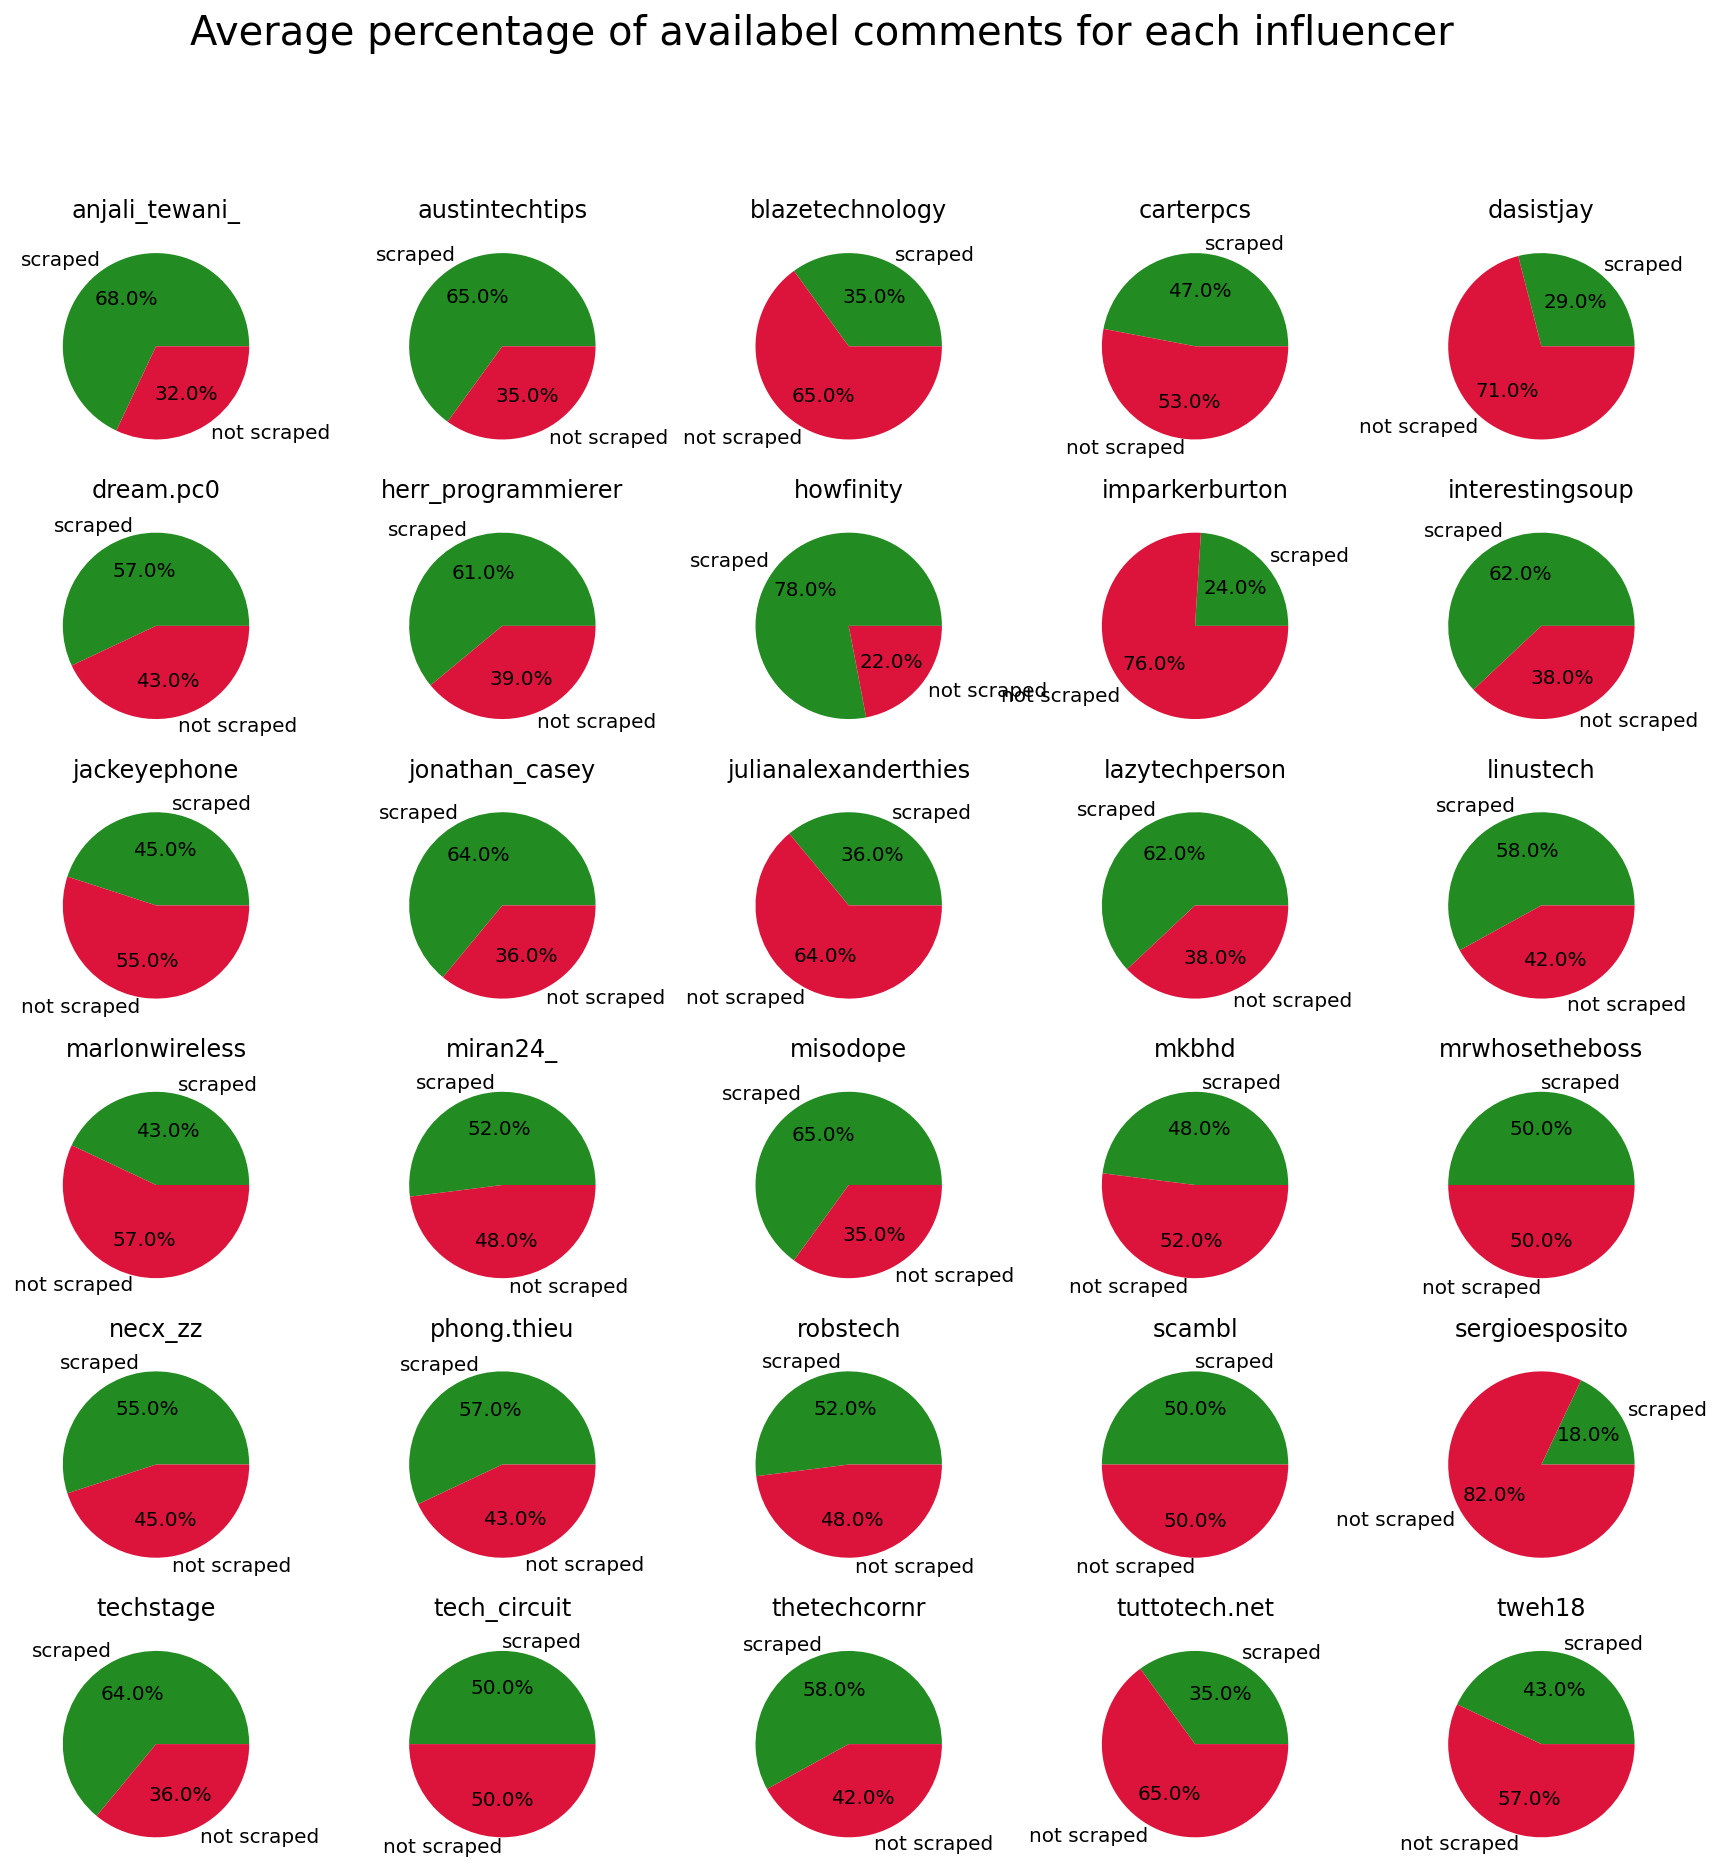

In [4]:
labels = list(scraping_stats.keys())
sizes =list(scraping_stats.values())

fig, axes = plt.subplots(6, 5, figsize=(15,15), dpi=144)
axes = axes.flatten()
plt.suptitle("Average percentage of availabel comments for each influencer", fontsize=20)

for ax, value, title in zip(axes, sizes, labels):
    ax.pie([value, 1-value], labels=['scraped','not scraped'], colors=['forestgreen', 'crimson'],autopct='%1.1f%%')
    ax.set_title(title, fontsize=12)
    
fig.savefig('screenshots/available_comments.jpg')

## Comment Analysis

### Emoji transformation

In [5]:
def translate_emoji(text):
        return emoji.demojize(text, delimiters=("", ""))

In [6]:
def remove_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text)

### Sentiment

In [7]:
def getSentiment(df, folder): 
    comment_clean = []
    comment_translated = []
    for index, row in df.iterrows():
        try:            
            comment_clean.append(translate_emoji(row['Comment Text']))
            comment_translated.append(translate_emoji(row['Comment Text']))
        except:
            comment_clean.append(np.nan)
            comment_translated.append(np.nan)

    df = df.assign(comments_clean=comment_clean)
    df = df.assign(comments_translated=comment_translated)
    

    #language
    #try:
    #    df = df.assign(language=df['comments_clean'].map(lambda text: detect(str(text))))
    #except:
    #    pass
    
    if folder in ['techstage', 'herr_programmierer', 'dasistjay']:
        #deutsch
        df = df.assign(sentiment_clean=df['comments_clean'].map(lambda text: TextBlobDE(str(text)).sentiment.polarity))
        df = df.assign(sentiment_with_emoji=df['comments_translated'].map(lambda text: TextBlobDE(str(text)).sentiment.polarity))
        
    else:
        df = df.assign(sentiment_clean=df['comments_clean'].map(lambda text: TextBlob(str(text)).sentiment.polarity))
        df = df.assign(sentiment_with_emoji=df['comments_translated'].map(lambda text: TextBlob(str(text)).sentiment.polarity))

    return df

### Loop over comment folder and calculate all sentiments

In [ ]:
commentfolderpath = '../01_Download/csv/comments' 
i = 0
sentiments = {}
for folder in tqdm(os.listdir(commentfolderpath)):
    temp_sentiments = {}
    print(folder, 'started')
    for file in os.listdir(str(commentfolderpath)+'/'+str(folder)):
        if not 'stats' in file:
            df = pd.read_csv(str(commentfolderpath)+'/'+str(folder)+'/'+str(file))
            mean=getSentiment(df, folder).sentiment_clean.mean()
            temp_sentiments[str(file.split('.')[0])] = mean
        else:
            print('Stat file. Skip.')
            continue
    #append sentiment dict
    sentiments[folder]=temp_sentiments

#sentiments

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

anjali_tewani_ started


  3%|██▊                                                                                | 1/30 [00:03<01:46,  3.66s/it]

Stat file. Skip.
austintechtips started


  7%|█████▌                                                                             | 2/30 [00:12<03:05,  6.63s/it]

Stat file. Skip.
blazetechnology started


 10%|████████▎                                                                          | 3/30 [00:25<04:22,  9.72s/it]

Stat file. Skip.
carterpcs started


 13%|███████████                                                                        | 4/30 [00:37<04:31, 10.45s/it]

Stat file. Skip.
dasistjay started


 17%|█████████████▊                                                                     | 5/30 [02:20<18:18, 43.93s/it]

Stat file. Skip.
dream.pc0 started


 20%|████████████████▌                                                                  | 6/30 [02:27<12:30, 31.29s/it]

Stat file. Skip.
herr_programmierer started


 23%|███████████████████▎                                                               | 7/30 [03:13<13:50, 36.13s/it]

Stat file. Skip.
howfinity started


 27%|██████████████████████▏                                                            | 8/30 [03:18<09:38, 26.31s/it]

Stat file. Skip.
imparkerburton started


 30%|████████████████████████▉                                                          | 9/30 [03:31<07:41, 21.96s/it]

Stat file. Skip.
interestingsoup started


 33%|███████████████████████████▎                                                      | 10/30 [03:33<05:18, 15.91s/it]

Stat file. Skip.
jackeyephone started


 37%|██████████████████████████████                                                    | 11/30 [03:41<04:16, 13.51s/it]

Stat file. Skip.
jonathan_casey started


 40%|████████████████████████████████▊                                                 | 12/30 [03:44<03:06, 10.38s/it]

Stat file. Skip.
julianalexanderthies started


 43%|███████████████████████████████████▌                                              | 13/30 [03:52<02:44,  9.68s/it]

Stat file. Skip.
lazytechperson started


 47%|██████████████████████████████████████▎                                           | 14/30 [03:54<01:56,  7.30s/it]

Stat file. Skip.
linustech started


 50%|█████████████████████████████████████████                                         | 15/30 [04:00<01:44,  6.99s/it]

Stat file. Skip.
marlonwireless started


 53%|███████████████████████████████████████████▋                                      | 16/30 [04:08<01:41,  7.26s/it]

Stat file. Skip.
miran24_ started


 57%|██████████████████████████████████████████████▍                                   | 17/30 [04:10<01:14,  5.72s/it]

Stat file. Skip.
misodope started


 60%|█████████████████████████████████████████████████▏                                | 18/30 [04:16<01:08,  5.72s/it]

Stat file. Skip.
mkbhd started


 63%|███████████████████████████████████████████████████▉                              | 19/30 [04:25<01:13,  6.71s/it]

Stat file. Skip.
mrwhosetheboss started


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [04:36<01:20,  8.03s/it]

Stat file. Skip.
necx_zz started


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [04:39<00:57,  6.42s/it]

Stat file. Skip.
phong.thieu started


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [04:44<00:49,  6.14s/it]

Stat file. Skip.
robstech started


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [04:49<00:38,  5.53s/it]

Stat file. Skip.
scambl started


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [04:58<00:40,  6.71s/it]

Stat file. Skip.
sergioesposito started


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [05:09<00:39,  7.85s/it]

Stat file. Skip.
techstage started


In [ ]:
#sentiments

### Create Sentiment dataframe

In [ ]:
columns = []
values=[]
new_dict={}
for key, value in sentiments.items():
    new_dict[key]=list(value.values())

df_sentiments = pd.DataFrame.from_dict(new_dict, orient='index').transpose()
df_sentiments.drop(df_sentiments.tail(1).index,inplace=True)
df_sentiments = df_sentiments.fillna(0)
df_sentiments

### Line Plot

In [ ]:
#create 30 different colors
#https://predictablynoisy.com/matplotlib/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
import pylab
NUM_COLORS = 30
colors =[]

cm = pylab.get_cmap('rainbow')
for i in range(NUM_COLORS):
    color = cm(1.*i/NUM_COLORS)
    colors.append(color)
   

In [ ]:
ax = df_sentiments.plot.line(figsize=(15,10), color=colors)
ax.set_ylabel('Sentiment')
ax.set_xlabel('Video Number')
ax.set_title('Comment Sentiments as Line Plot', fontsize=20)

ax.figure.savefig('screenshots/line_plot.jpg')

### Histogram

In [ ]:
ax = df_sentiments.plot.hist(figsize=(15,10), bins=100, color=colors)

ax.set_xlabel('Sentiment')
ax.set_title('Comment Sentiments as Histogram', fontsize=20)

ax.figure.savefig('screenshots/histogram.jpg')